In this tutorial we are going to see how to take samples from our data and compute and plot confidence intervals. In addition, you guys are going to demonstrate a few concepts and statements introduced in the lectures.

In [1]:
sat.dat<-read.csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/sat.act.csv")

sat.dat$gender<-as.factor(sat.dat$gender)
sat.dat$education<-as.factor(sat.dat$education)

# Sampling

The R built-in function `sample` allows you to get samples from a given **vector** of values. For example, let's take a sample of 100 observations from the ACT scores.

In [2]:
sample(sat.dat$ACT, size=100)

[1] 21 35 28 33 20 22 28 35 23 28 32 33 30 30 20 28 28 28 32 28 32 27 28 32 32
 [26] 32 29 28 32 34 29 23 35 26 31 23 24 33 32 34 29 33 34 33 36 28 21 25 34 35
 [51] 31 36 31 36 34 27 20 35 18 35 32 21 30 26 27 32 30 34 23 31 28 32 36 31 23
 [76] 29 33 36 34 33 32 25 17 25 29 28 21 26 32 29 32 30 31 35 28 36 19 32 35 29

This, however, is restricted to vectors, but what if we want to sample a data frame? We can do it with the function `sample_n` from tidyverse.

In [3]:
library(tidyverse)
sample_n(sat.dat, size=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.1 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


X,gender,education,age,ACT,SATV,SATQ
<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
34319,1,4,30,21,500,450
38176,1,3,18,27,670,670
30302,2,4,24,36,650,650
36120,2,5,34,32,640,480
39097,1,5,24,31,770,670
34624,2,1,18,27,700,650
39109,2,5,24,32,600,750
38976,1,5,58,34,675,680
31937,2,1,17,30,700,700


In [4]:
# Here using the pipe operator
sat.dat %>% sample_n(size=10)

X,gender,education,age,ACT,SATV,SATQ
<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
37130,1,3,19,30,450,450
34648,1,2,19,31,680,700
33672,2,2,19,30,600,600
33607,2,3,30,24,640,750
30732,2,5,47,24,520,530
33061,2,4,22,30,720,650
38860,2,3,19,31,710,610
30402,1,4,35,34,600,760
37001,1,0,18,20,400,400


# Confidence Intervals

As we saw in the lectures, our estimations of the mean will never be accurate, so it is a common practice to build confidence intervals around this measure, so that we have some degree of confidence about the observed value.

As noted in the lectures, the confidence intervals are usually given in terms of percentage, (1-$\alpha$)$\cdot$100%, which tells you that if you are to repeat the sampling many times, the given percentage of samples would contain the population mean.

To calculate these confidence intervals, one basically has to take the estimated mean and build a symmetrical distribution around it. Then, one just needs to calculate the cut-off values in this distribution such that it contains the  (1-$\alpha$)$\cdot$100 of the points. This can be very easily accomplished using the quantile function. (**N.B.** This is one way of calculating confidence intervals that works well for the mean. However, you can always build confidence intervals around ANY statistics, so for some cases, you may need to use a different method, e.g. using a procedure called "bootstrapping". This is beyond the scope of this course.)

We also showed that one has to use different quantile functions depending on the situation encountered. Let's see this for the calculation of the 95% confidence intervals of the mean (say equal to 10), from a sample of size 30.

In [5]:
alpha<-0.05 # because of 95% = 100*(1-0.05)
n<-30 # sample size

- Data follow a GAUSSIAN DISTRIBUTION and standard deviation of the population is KNOWN. Here we use the quantiles from the standard gaussian distribution, which in R is computed with the function `qnorm`.

In [6]:
z.alpha052<-qnorm(alpha/2)
z.alpha052

[1] -1.959964

For this then we would build our 95% confidence intervals for a given sample like this:

< X > $\pm$ 1.95996398454005 * $\frac{\sigma}{\sqrt{n}}$

- GAUSSIAN distribution and standard deviation of the population is UNKNOWN.
- NON-GAUSSIAN distribution.

Here we would use the quantiles from the Student's t-distribution. In R this is calculated with the function `qt`.

In [7]:
t.29.alpha052<-qt(alpha/2, df = n-1)
t.29.alpha052

[1] -2.04523

And the 95% confidence intervals would be expressed in this case like:

< X > $\pm$ 2.0452296421327 * $\frac{\hat{\sigma}}{\sqrt{n}}$

Here, since we don't know the standard deviation from the population, we will estimate it from the sample. That's why we have a hat, i.e. $\hat{\sigma}$. This is calculated with the R function `sd`. 

As you can see, this result is way different from the previous one, because the t-distribution has heavier tails than the gaussian distribution. However, as the sample sizes increase, the t-distribution converges to a gaussian distribution, so results should not differ that much in such scenarios. Let's see this.

In [8]:
sample.size<-c(30, 50, 100, 500)
print(z.alpha052)

for (sample.size in sample.size)
{
    print(qt(alpha/2, df = sample.size-1))
}

[1] -1.959964
[1] -2.04523
[1] -2.009575
[1] -1.984217
[1] -1.964729


<div class="alert alert-info"> <b>Demonstration</b>: The (1-$\alpha$)$\cdot$100% confidence intervals could be interpreted as the (1-$\alpha$)$\cdot$100% of the experiments that will include the real mean, if we are to replicate an experiment many times and compute the confidence intervals each time.

Let's demonstrate this for a population that follows a Gaussian distribution with mean=100 and standard deviation=15. Consider 500 experiments. In each experiment, sample 100 observations from a population with the aforementioned parameters (mean=100, standard deviation=15), calculate the sample mean and standard deviation. These will be the estimated parameters for our population. Then, calculate the 95% confidence interval. Finally, check - i.e you should obtain a logical value (i.e. TRUE or FALSE) - whether this confidence interval contains the population mean (100). For each experiment, store the final logic value into a vector. With this vector of 500 logical values (one for each experiment), calculate the proportion of TRUES in the vector. It should give approximately 95%.  
</div>

In [9]:
set.seed(1234)
n.exp<-500
alpha<-0.05
n<-100
z.alpha052<-qnorm(alpha/2)
inside.cis<-c()
for(ii in c(1:n.exp)){
    exp.sample<-rnorm(n, mean = 100, sd=15)
    mu.exp<-mean(exp.sample)
    std.exp<-sd(exp.sample)
    inside.cis<-c((100 > mu.exp + z.alpha052[1]*std.exp/sqrt(n)) & (100 < mu.exp - z.alpha052[1]*std.exp/sqrt(n)), inside.cis)
}

In [10]:
sum(inside.cis)/n.exp

[1] 0.948

# Plotting confidence intervals

Some times, you may want to plot the confidence intervals. We are going to see now how to do this using the libraries **ggplot** and **dplyr**.

In [11]:
library(tidyverse)

In [12]:
act.summary<-sat.dat %>% 
group_by(education) %>%
summarize(mu=mean(ACT), 
       std=sd(ACT), 
       N=n(), 
       se=std/sqrt(N),
       tn1.alpha2=qt(0.025, df = N-1))

act.summary

education,mu,std,N,se,tn1.alpha2
<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
0,27.47368,5.206813,57,0.6896592,-2.003241
1,27.48889,6.055134,45,0.9026461,-2.015368
2,26.97727,5.808929,44,0.8757290,-2.016692
3,28.29455,4.846227,275,0.2922385,-1.968660
4,29.26087,4.345153,138,0.3698840,-1.977431
5,29.60284,3.954887,141,0.3330616,-1.977054


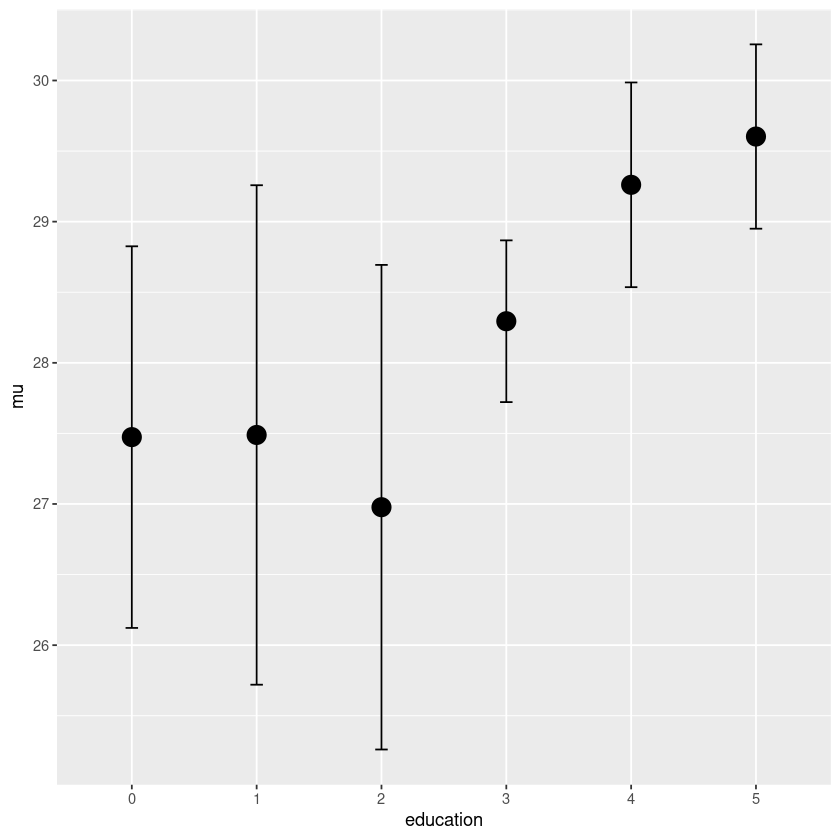

In [13]:
ggplot(data = act.summary, aes(x=education, y=mu)) + 
geom_errorbar(aes(ymin=mu-1.96*se, ymax=mu+1.96*se), width=.1) + 
geom_point(size=5)

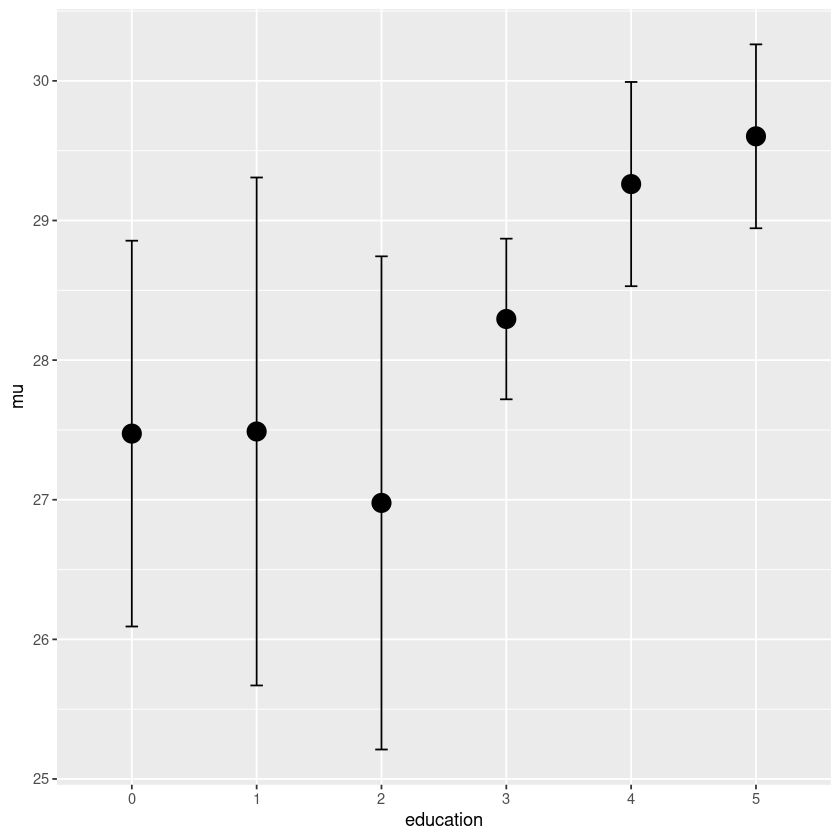

In [14]:
ggplot(data = act.summary, aes(x=education, y=mu)) + 
geom_errorbar(aes(ymin=mu+tn1.alpha2*se, ymax=mu-tn1.alpha2*se), width=.1) + 
geom_point(size=5)

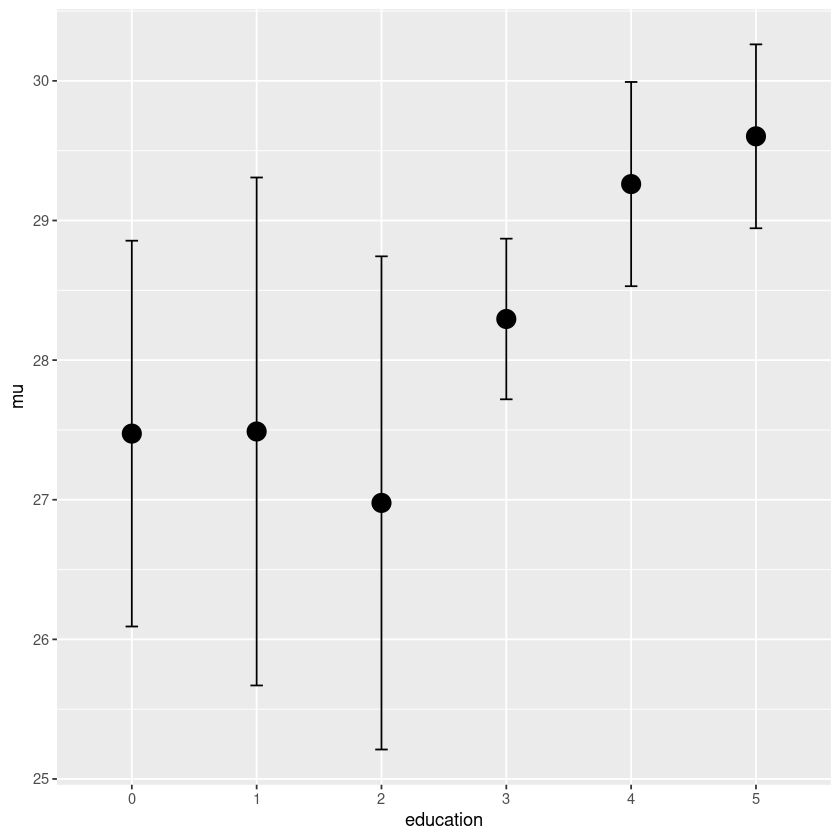

In [15]:
# This is the  same as above
ggplot(data = act.summary, aes(x=education, y=mu)) + 
geom_errorbar(aes(ymin=mu-abs(qt(0.025, df = N-1))*se, ymax=mu+abs(qt(0.025, df = N-1))*se), width=.1) + 
geom_point(size=5)

As you can see, the confidence intervals for education > 2 are similar to the gaussian case; and that's because for those categories, the sample sizes were large.

<div class="alert alert-info"> <b>Demonstration</b>: As the sample size increases, the sample mean tends to the population mean.

Let's demonstrate this for a population whose weight follows a gaussian distribution with mean = 70kg and standard deviation=10kg. 
    
Consider the following sequence of samples sizes: (5, 10, 50, 100, 200, 500, 1000, 5000, 10000). For each of these sample sizes, generate a random sample and take the mean. Plot these against the sample sizes.
</div>

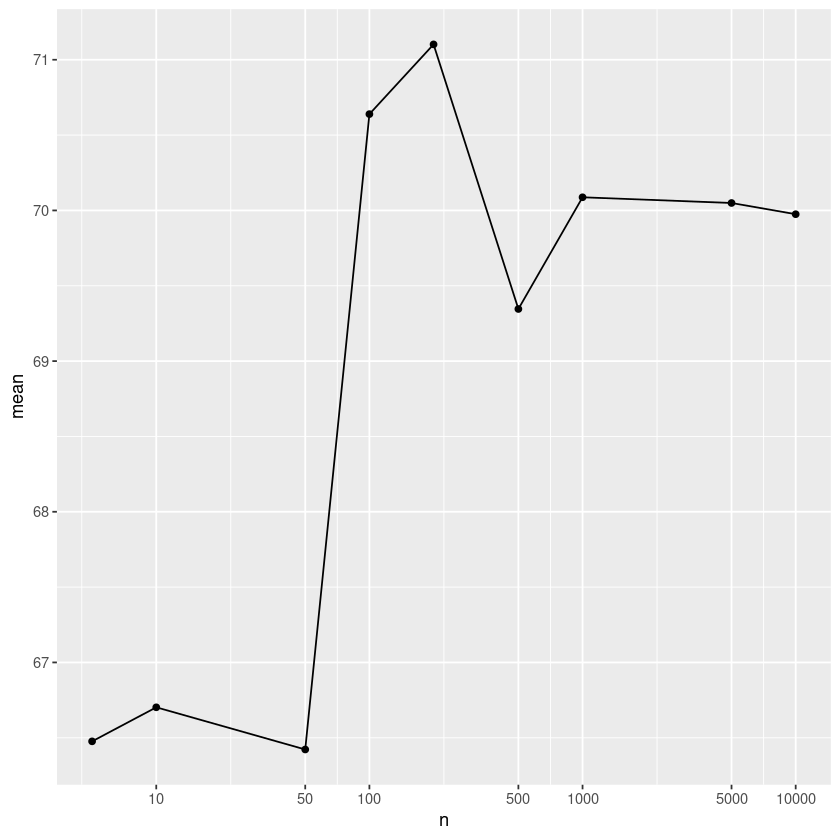

In [16]:
library(tidyverse)
sample.sizes<-c(5, 10, 50, 100, 200, 500, 1000, 5000, 10000)
set.seed(1234)
dat<-data.frame(n=sample.sizes, 
                mean=sapply(sample.sizes, function(x) mean(rnorm(x, mean = 70, sd = 10))))
ggplot(dat, aes(x=n, y=mean)) + geom_point() + geom_line() +  
                            scale_x_continuous(trans='log2', breaks = c(10, 50, 100, 500, 1000, 5000, 10000))       

<div class="alert alert-info"> <b>Demonstration</b>: The estimation of the standard deviation of the population goes with N-1 instead of N.
    
To demonstrate this, consider sampling from the population of IQ's, that is, from a normal distribution with mean=100 and standard deviation=15. Now, using `rnorm`, extract 10,000 samples with 2 observation, 10,000 more with 3 observations, and so on up to a sample size of 10. In each of these samples, calculate the mean, the standard deviation using the built-in R function `sd` (which divides by N-1), and the standard deviation divided by N (you will need to implement it yourself). 
    
Then, plot the average of the sample means and the average of the standard deviations versus the sample size. You should see that, on average, the sample means are always around 100, regardless of the sample size.  However, the estimated standard deviations calculated dividing by N turn out to be systematically too small, especially for small sample sizes. Dividing by N-1 tries to circumvent this.
</div>

In [17]:
sd.N<-function(x){
    N<-length(x)
    mu<-mean(x)
    return(sqrt(mean((mu-x)**2)))
}
sample.sizes<-c(2:10)

set.seed(1234)
means<-c()
sdsN<-c()
sds<-c()

for(n in sample.sizes){
    datasets<-lapply(c(1:10000), function(x) rnorm(n, mean = 100, sd=15))
    means<-c(means, mean(sapply(datasets, mean)))
    sdsN<-c(sdsN, mean(sapply(datasets, sd.N)))
    sds<-c(sds, mean(sapply(datasets, sd)))
             
}

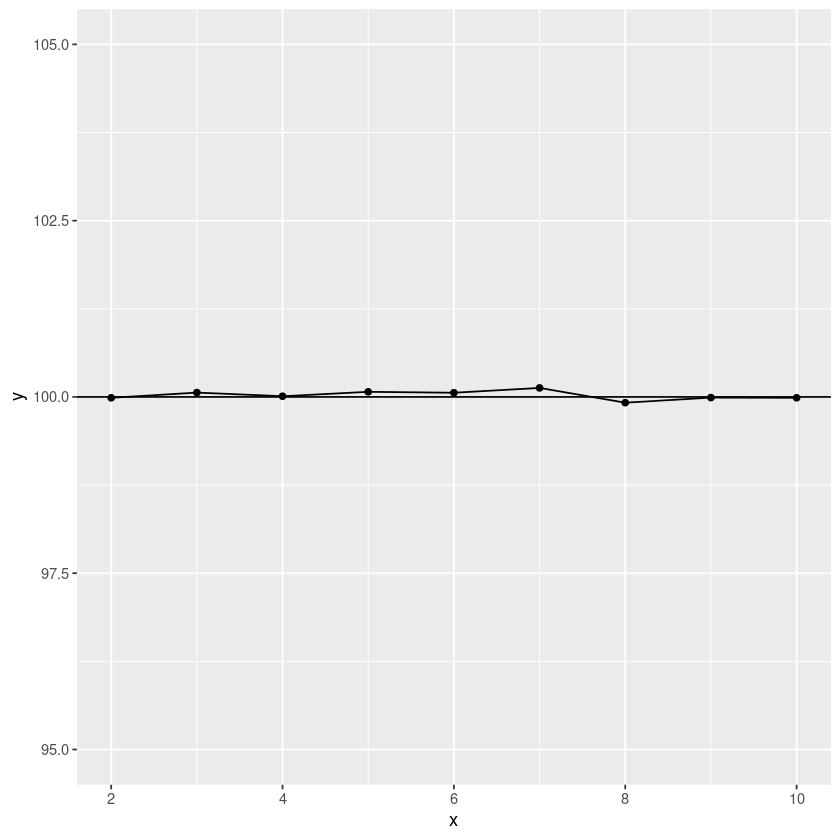

In [18]:
ggplot(data = data.frame(x=sample.sizes, y=means), aes(x=x, y=y)) + 
geom_point() + 
geom_line() + 
geom_hline(yintercept = 100) + ylim(95, 105)

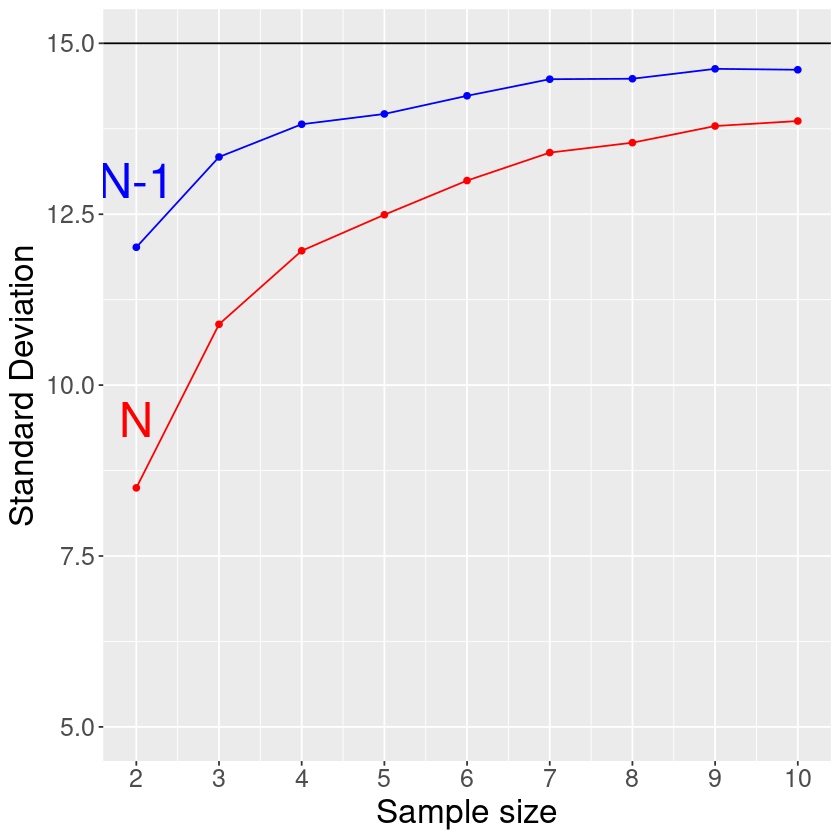

In [19]:
ggplot(data = data.frame(x=sample.sizes, y1=sdsN, y2=sds)) + 
geom_point(aes(x=x, y=y1), color='red') + 
geom_line(aes(x=x, y=y1), color='red') +
geom_point(aes(x=x, y=y2), color='blue') + 
geom_line(aes(x=x, y=y2), color='blue') +
geom_hline(yintercept = 15) + ylim(5, 15) +
annotate("text", label = "N", x=2, y=9.5, size=10,color="red") + 
annotate("text", label = "N-1", x=2, y=13, size=10,color="blue") +
scale_x_continuous(breaks=sample.sizes) + 
xlab("Sample size") + 
ylab("Standard Deviation") + 
theme(axis.title = element_text(size = 20), axis.text =  element_text(size = 15))   

We can see how by diving by N-1 instead of N, our estimation of the standard deviation gets closer to the real one.